In [1]:
import os #import os module to import and export the files
import pandas as pd #import pandas for the various data manupulation and data analysis
import numpy as np #import numpy for maths
from pandas import DataFrame,Series 
import matplotlib.pyplot as plt #import matplotlib for various matlab like plots
import seaborn as sns #beautiful library for various plots to work with

In [2]:
import warnings #import warnings to ignore various warnings that clicks during working
warnings.filterwarnings("ignore")

#### Step:1 set the question what we are to do with the data, what should be outcomes of this model?.

we're performing classification, we can use accuracy — the fraction of correctly classified flowers— to quantify how well
our model is performing.

#### Step:2 Checking the data

In [3]:
os.chdir("E:\\001 Jigsaw Academy\\JIGSAW\Projects\\Project 2 Iris Flower species classification") #changed the library where my data is being stored

In [4]:
data=pd.read_csv("iris.csv",na_values=['NA']) #import the data, here i am using na_values=['NA'] because priorely i knew that 
#missing values are in the form of NA they could be in another form also(like 8888, Nan,or may be a empty cell), so keep these
#things in mind while apply na_values you will have to mention thosse all in case they differ.

In [5]:
data.head() #lets look for the top five values in our data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.isnull().sum() #lets look for the null/missing values in our data, you can see null value for particular column also by
#applying data.column_name.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
data.info() #now lets look for the various data types that our data has, we can see we have float and obejct data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
data.Species.unique() #lets look for the category for which we have to do analysis or make prediction for.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
data.describe() #lets have a look at descriptive statistics for any descipency in our data, like outliers, max, min, mean,
#median and much more

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


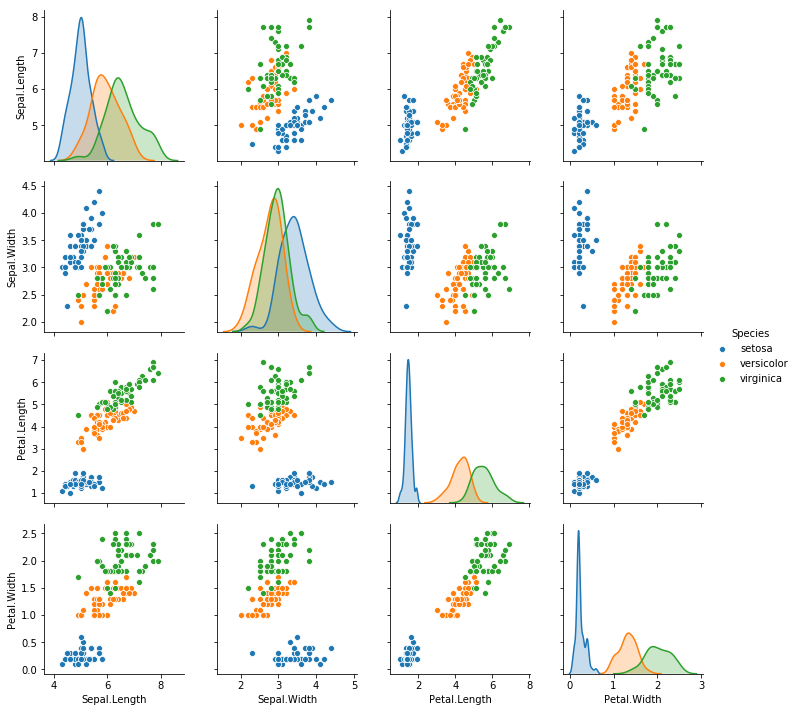

In [10]:
sns.pairplot(data,hue='Species') #now use sns.pairplot plot to see the various relationship between the column pairs for
plt.show()  #better understanding the realtion among them

In [11]:
# as we know we have to apply many manupulations on data (like treatment of outlier, treatment of missing values etc.), so in
#this preocess might get changed and to ensure that we are having clean data based on which we can move for further analysis
# we must ensure some values like our targeted prediction category, there is no missing values etc.

In [12]:
#assert function gives us that verification if our data failed to assert the given value then this will create and assertion error.

In [13]:
assert(len(data['Species'].unique()))==3

In [14]:
assert len(data.loc[(data['Sepal.Length'].isnull()) |
                               (data['Sepal.Width'].isnull()) |
                               (data['Petal.Length'].isnull()) |
                               (data['Petal.Width'].isnull())]) == 0

#### Step:4 Exploratory Data Analysis

Now after spending entirely too much time tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

1.How is my data distributed?

2.Are there any correlations in my data?

3.Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

Let's return to that scatterplot matrix that we used earlier

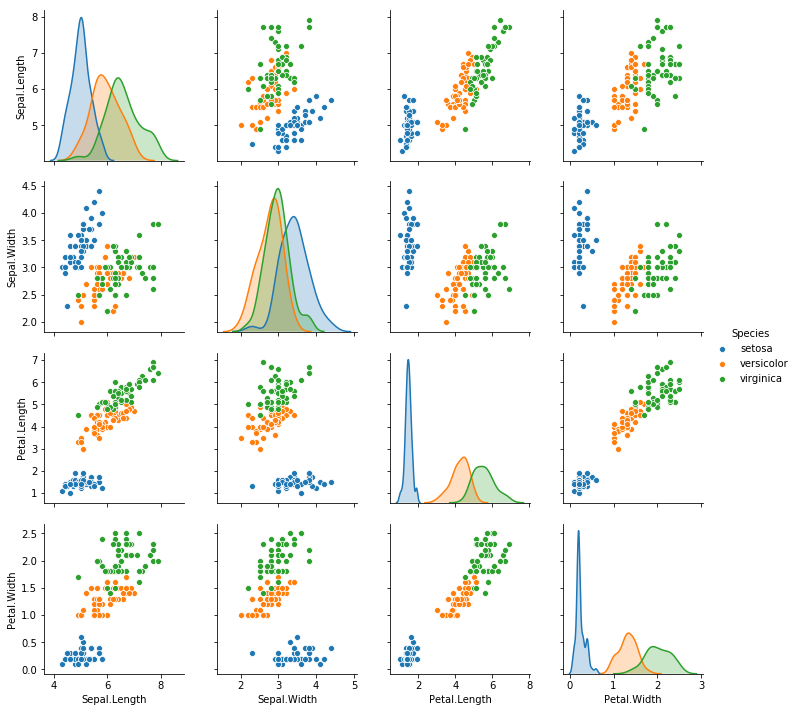

In [15]:
sns.pairplot(data,hue='Species')
plt.show()

We can also make violin plots of the data to compare the measurement distributions of the classes.
Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

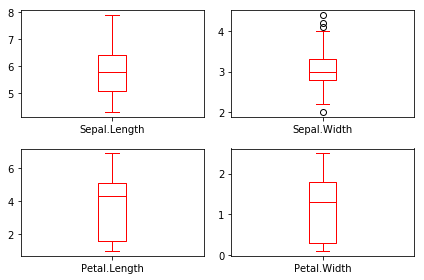

In [16]:
data.plot(kind='box',color='red',subplots=True,layout=(2,2),sharex=False)
plt.tight_layout()
plt.show()

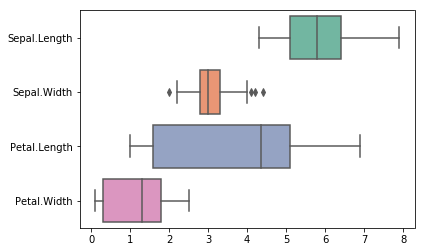

In [17]:
sns.boxplot(data=data,orient='h',palette='Set2') #make boxplots to better anylyise the distribution of our data for differnt Species.

#### Step:5 Classification

In [18]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
x=data.drop("Species",axis=1)
y=data['Species']

In [20]:
y=pd.get_dummies(y)

In [21]:
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Now apply varios modules to check which can give the better classification accuracy.

In [23]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.30,random_state=50)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3,random_state=50)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [25]:
clf.score(x_test,y_test)

0.9555555555555556

In [26]:
import pydotplus
os.environ['path']+=os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [27]:
import sklearn.tree as tree

In [28]:
dot_data=tree.export_graphviz(clf,out_file=None,rounded=True,filled=True,feature_names=x.columns,special_characters=True,proportion=True)

In [29]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [30]:
from IPython.display import Image 

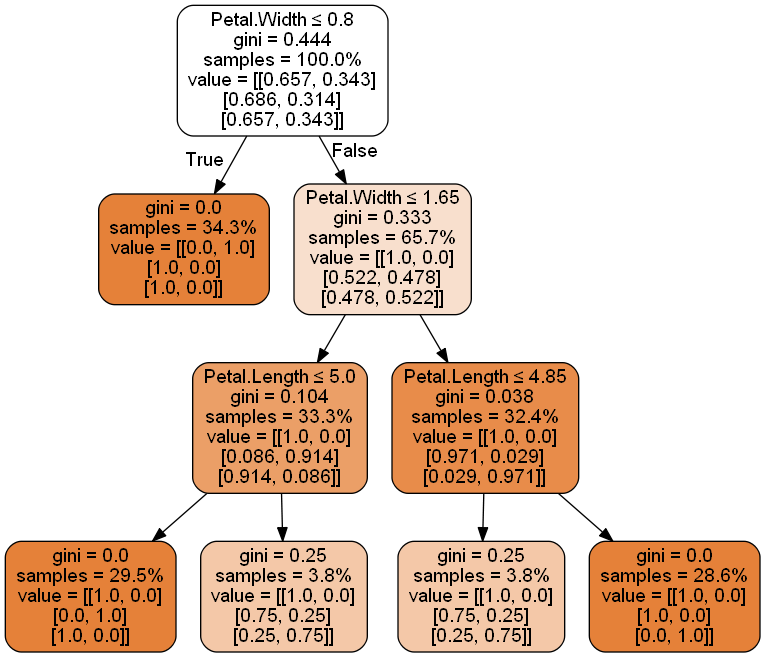

In [31]:
Image(graph.create_png())

In [32]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [33]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [34]:
mod.best_score_

0.9714285714285714

In [35]:
import sklearn.linear_model as linear_model

In [40]:
clf=linear_model.LogisticRegression(multi_class='ovr',penalty="l2",solver="lbfgs")
clf=clf.fit(x_train,y_train)

ValueError: bad input shape (105, 3)

In [43]:
x_train.shape,y_train.shape

((105, 4), (105, 3))

In [44]:
x_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
17,5.1,3.5,1.4,0.3
42,4.4,3.2,1.3,0.2
18,5.7,3.8,1.7,0.3
146,6.3,2.5,5.0,1.9
114,5.8,2.8,5.1,2.4


In [45]:
y_train.head()

,setosa,versicolor,virginica
17,1,0,0
42,1,0,0
18,1,0,0
146,0,0,1
114,0,0,1


In [37]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)